In [1]:
#Importing the necessary Libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

#Preprocessing

In [2]:
#Performing data augmentation on training set
train_datagen = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  rescale = 1. /255
)

In [3]:
#rescaling the cvalidation set
validate_datagen = ImageDataGenerator(
    rescale = 1. /255
)

In [4]:
#location of both validation and training set
val_data_loc = "/content/drive/MyDrive/Validation"
train_data_loc = "/content/drive/MyDrive/Train"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Data generator applied on my training set
train_generator = train_datagen.flow_from_directory(
    train_data_loc,
    target_size = (180,180),
    batch_size = 300,
    class_mode = 'binary'
)

#Data generator applied on validation set
validation_generator = validate_datagen.flow_from_directory(
    val_data_loc,
    target_size = (180,180),
    batch_size = 300,
    class_mode = 'binary'
)

Found 20105 images belonging to 2 classes.
Found 5123 images belonging to 2 classes.


#Model Training

In [7]:
#Importing Necessary Libraries for Model Training
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

In [8]:
#using the VGG16 model as base for feature extraction
base_model = VGG16(weights  = 'imagenet', include_top = False, input_shape = (180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
12/68 [====>.........................] - ETA: 30:13 - loss: 0.8992 - accuracy: 0.5164

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


68/68 [==============================] - 3366s 49s/step - loss: 0.6257 - accuracy: 0.6626 - val_loss: 0.3205 - val_accuracy: 0.8733
Epoch 2/10
68/68 [==============================] - 264s 4s/step - loss: 0.4026 - accuracy: 0.8228 - val_loss: 0.2526 - val_accuracy: 0.8971
Epoch 3/10
68/68 [==============================] - 261s 4s/step - loss: 0.3640 - accuracy: 0.8420 - val_loss: 0.2536 - val_accuracy: 0.8944
Epoch 4/10
68/68 [==============================] - 258s 4s/step - loss: 0.3379 - accuracy: 0.8545 - val_loss: 0.2240 - val_accuracy: 0.9112
Epoch 5/10
68/68 [==============================] - 259s 4s/step - loss: 0.3366 - accuracy: 0.8523 - val_loss: 0.2104 - val_accuracy: 0.9147
Epoch 6/10
68/68 [==============================] - 259s 4s/step - loss: 0.3346 - accuracy: 0.8582 - val_loss: 0.2889 - val_accuracy: 0.9145
Epoch 7/10
68/68 [==============================] - 258s 4s/step - loss: 0.3445 - accuracy: 0.8538 - val_loss: 0.2346 - val_accuracy: 0.9168
Epoch 8/10
68/68 [====

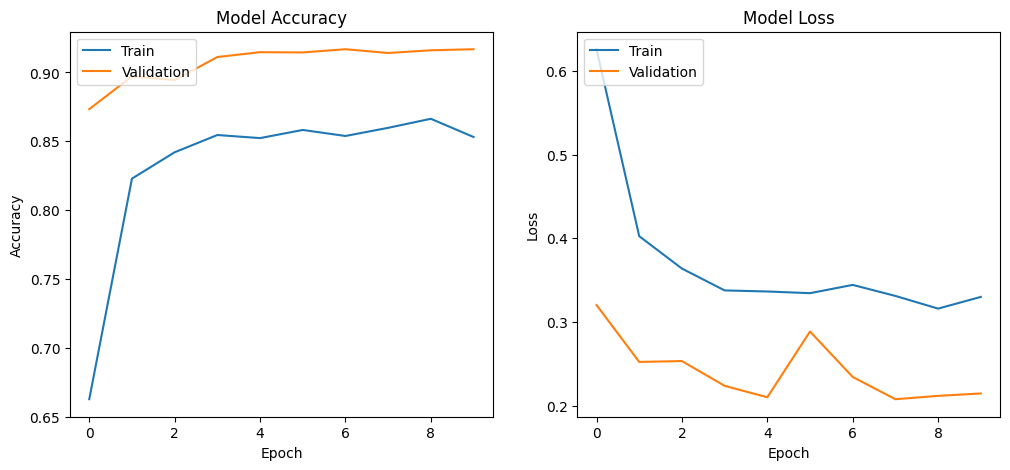

In [13]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [14]:
model.save('cat_or_dog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
